In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd

In [2]:
piano_data, piano_samplerate = sf.read("PianoLaPeriod.wav")
violin_data, violin_samplerate = sf.read("ViolinLaPeriod.wav")
trumpet_data, trumpet_samplerate = sf.read("TrumpetLaPeriod.wav")
flute_data, flute_samplerate = sf.read('FluteLaPeriod.wav')

In [3]:
piano_time = (np.arange(len(piano_data)))/(piano_samplerate)
flute_time = (np.arange(len(flute_data)))/(flute_samplerate)
trumpet_time = (np.arange(len(trumpet_data)))/(trumpet_samplerate)
violin_time = (np.arange(len(violin_data)))/(violin_samplerate)

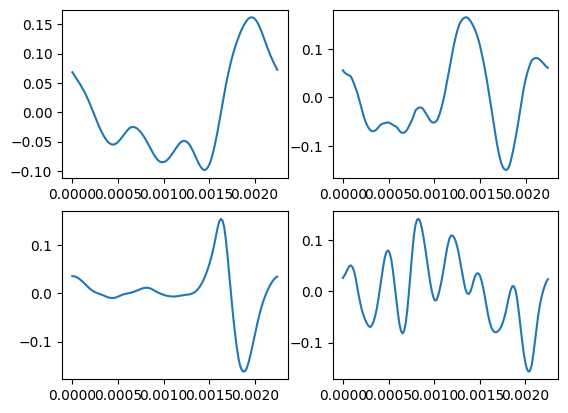

In [4]:
plt.subplot(2,2,1)
plt.plot(piano_time,piano_data)
plt.subplot(2,2,2)
plt.plot(flute_time,flute_data)
plt.subplot(2,2,3)
plt.plot(trumpet_time,trumpet_data)
plt.subplot(2,2,4)
plt.plot(violin_time,violin_data)

In [5]:
piano_extdata = np.array(list(piano_data)*1000)
piano_exttime = (np.arange(len(piano_extdata)))/piano_samplerate

In [6]:
devices = sd.query_devices()
for idx, device in enumerate(devices):
    print(f"Device {idx}: {device['name']}")
#sd.play(piano_extdata,piano_time)
#sd.wait()

In [7]:
piano_freqdata = np.fft.fft(piano_data)
N = len(piano_freqdata)
sr = piano_samplerate/N
freq_piano = np.arange(N)*sr
#plt.stem(freq_piano,np.abs(piano_freqdata))
#plt.title('Piano spectrum')
#plt.xlim(0,10000)

In [8]:
trumpet_freqdata = np.fft.fft(trumpet_data)
sr = trumpet_samplerate/N
freq_trumpet = np.arange(N)*sr
#plt.stem(freq_trumpet,np.abs(trumpet_freqdata))
#plt.title('Trumpet spectrum')
#plt.xlim(0,10000)

In [9]:
violin_freqdata = np.fft.fft(violin_data)
sr = violin_samplerate/N
freq_violin = np.arange(N)*sr
#plt.stem(freq_violin,np.abs(violin_freqdata))
#plt.title('Violin spectrum')
#plt.xlim(0,10000)

In [10]:
flute_freqdata = np.fft.fft(flute_data)
sr = flute_samplerate/N
freq_flute = np.arange(N)*sr
#plt.stem(freq_flute,np.abs(flute_freqdata))
#plt.title('Flute spectrum')
#plt.xlim(0,10000)

(0.0, 10000.0)

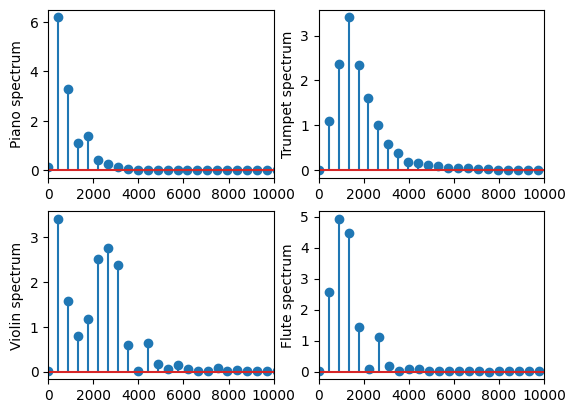

In [11]:
plt.subplot(2,2,4)
plt.stem(freq_flute,np.abs(flute_freqdata))
plt.ylabel('Flute spectrum')
plt.xlim(0,10000)

plt.subplot(2,2,3)
plt.stem(freq_violin,np.abs(violin_freqdata))
plt.ylabel('Violin spectrum')
plt.xlim(0,10000)

plt.subplot(2,2,2)
plt.stem(freq_trumpet,np.abs(trumpet_freqdata))
plt.ylabel('Trumpet spectrum')
plt.xlim(0,10000)

plt.subplot(2,2,1)
plt.stem(freq_piano,np.abs(piano_freqdata))
plt.ylabel('Piano spectrum')
plt.xlim(0,10000)    

In [12]:
#Finding fundamental frequencies
ffp = freq_piano[1]
fft = freq_trumpet[1]
ffv = freq_violin[1]
fff = freq_flute[1]
print(ffp,fft,ffv,fff)

441.328125 441.75 441.859375 443.375
